## In this Notebook, I'm going to perform PCA using sklearn, Plan of attack is,
- Run KNN Model without performing PCA
- Check Accuracy
- Apply PCA and run model again
- Check Accuracy
- Then it comes to visualization
- We visualize the data by decompose it to 3D
- We visualize the data by decompose it to 2D
- Find some important attributes of PCA
- Find the optimal number of dimestions (columns) to reach the best performance

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/digit-recognizer/sample_submission.csv
/kaggle/input/digit-recognizer/train.csv
/kaggle/input/digit-recognizer/test.csv


In [3]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns

In [5]:
df = pd.read_csv("/kaggle/input/digit-recognizer/train.csv")

df.head()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [14]:
df.sample()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
2281,7,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


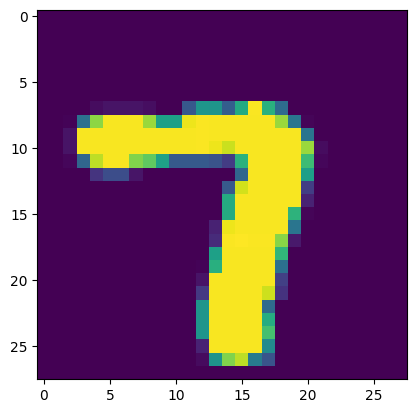

In [16]:
plt.imshow(df.iloc[2281, 1:].values.reshape(28, 28))


## Apply KNN Model Without PCA

## Train Test Split

In [17]:
from sklearn.model_selection import train_test_split

In [19]:
X = df.drop('label', axis = 1)
Y = df['label']

In [22]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2)

X_train.shape
X_test.shape

(8400, 784)

### KNN Model

In [24]:
from sklearn.neighbors import KNeighborsClassifier

In [26]:
knn = KNeighborsClassifier()

knn.fit(X_train, Y_train)

knn.score(X_test, Y_test)

0.9704761904761905

## Apply KNN With PCA

### Apply PCA

In [30]:
from sklearn.decomposition import PCA

In [32]:
pca = PCA(n_components = 200)

X_train_pca = pca.fit_transform(X_train)
X_test_pca = pca.transform(X_test)

### Apply KNN

In [33]:
knn = KNeighborsClassifier()

knn.fit(X_train_pca, Y_train)

knn.score(X_test_pca, Y_test)

0.9716666666666667

## Check How much Dimestions are best

Normally it's a rule of thumb that sum of 90% variance is the best number of features

In [36]:
for i in range(1, 785):
    
    pca = PCA(n_components = i)
    X_train_pca = pca.fit_transform(X_train)
    X_test_pca = pca.transform(X_test)

    knn = KNeighborsClassifier()
    knn.fit(X_train_pca, Y_train)
    print(knn.score(X_test_pca, Y_test))

0.2694047619047619
0.4188095238095238
0.48595238095238097
0.6269047619047619
0.7386904761904762
0.8308333333333333
0.8680952380952381
0.8964285714285715
0.9086904761904762
0.9261904761904762
0.9341666666666667
0.9452380952380952
0.9485714285714286
0.9552380952380952
0.9570238095238095
0.9629761904761904
0.9642857142857143
0.9670238095238095
0.9691666666666666
0.9696428571428571
0.9720238095238095
0.9716666666666667
0.9725
0.9726190476190476
0.9730952380952381
0.9739285714285715
0.9758333333333333
0.9752380952380952
0.976547619047619
0.9763095238095238
0.9769047619047619
0.9769047619047619
0.9770238095238095
0.9764285714285714
0.9766666666666667
0.9771428571428571
0.9767857142857143
0.9771428571428571
0.9773809523809524
0.9771428571428571
0.9767857142857143
0.9766666666666667
0.9766666666666667
0.9773809523809524
0.9777380952380952
0.9777380952380952
0.9777380952380952
0.9777380952380952
0.9775
0.9766666666666667
0.9770238095238095
0.9773809523809524
0.9773809523809524
0.977023809523809

KeyboardInterrupt: 

## Visualization

### 3D Visualization

In [ ]:
pca = PCA(n_components = 3)
X_train_pca = pca.fit_transform(X_train)
X_test_pca = pca.transform(X_test)

In [40]:
import plotly.express as px

In [55]:
fig = px.scatter_3d(X_train_pca,
                   x = X_train_pca[:, 0],
                   y = X_train_pca[:, 1],
                   z = X_train_pca[:, 2],
                   color = Y_train.astype('str'))

fig.update_traces(marker = dict(size = 8,
                               line = dict(width = 2,
                                          color = "DarkSlateGrey")),
                 selector = dict(mode = 'markers')
                 )

fig.show()

### 2D Visualization

In [56]:
pca = PCA(n_components = 2)
X_train_pca = pca.fit_transform(X_train)
X_test_pca = pca.transform(X_test)

In [58]:
fig = px.scatter(X_train_pca,
                   x = X_train_pca[:, 0],
                   y = X_train_pca[:, 1],
                   color = Y_train.astype('str'))

fig.update_traces(marker = dict(size = 8,
                               line = dict(width = 1,
                                          color = "DarkSlateGrey")),
                 selector = dict(mode = 'markers')
                 )

fig.show()

## Important Parameters of PCA

In [64]:
pca = PCA(n_components = None)
X_train_pca = pca.fit_transform(X_train)
X_test_pca = pca.transform(X_test)

In [66]:
# For getting how much variance each point cover

pca.explained_variance_.shape

(784,)

In [72]:
# For getting the percentage of variance each data point cover

(pca.explained_variance_ratio_*100).shape

(784,)

In [68]:
# Eigen Vectors

pca.components_

array([[-3.47499769e-19,  5.55111512e-17, -0.00000000e+00, ...,
        -0.00000000e+00, -0.00000000e+00, -0.00000000e+00],
       [ 5.49986487e-19, -0.00000000e+00, -0.00000000e+00, ...,
        -0.00000000e+00, -0.00000000e+00, -0.00000000e+00],
       [ 1.89079318e-20, -3.46944695e-18, -5.20417043e-17, ...,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00],
       ...,
       [ 0.00000000e+00,  2.74319966e-01,  4.88940160e-02, ...,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00],
       [-0.00000000e+00, -8.84864759e-02, -5.67312592e-02, ...,
        -0.00000000e+00, -0.00000000e+00, -0.00000000e+00],
       [ 0.00000000e+00, -6.28655120e-02,  6.66220856e-02, ...,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00]])

## How to find number of no. of dimentions provide best results

#### Remember, it's a rule of thumb that, select the number of data points which covers 90% of variance. It's a rule of thumb. Means get specific number of data points which covers 90% of variance

#### How can we do that??
- explained_variance_ratio_ provide us with the percentage of variance of each data point.
- we just need to find cummulative sum (second is the addition of second and first, third is additon of first, second and third) of all and we get it
- After getting the cummulative sum, it became difficult to count the previous number of data points, so we use the line chart

In [73]:
# Get the percentage of variance

pca.explained_variance_ratio_ * 100

array([9.75531085e+00, 7.15463078e+00, 6.11243447e+00, 5.38009113e+00,
       4.91260063e+00, 4.31357060e+00, 3.27608259e+00, 2.89133638e+00,
       2.78286403e+00, 2.34604440e+00, 2.08835634e+00, 2.04837766e+00,
       1.70899207e+00, 1.69389821e+00, 1.57956685e+00, 1.47913917e+00,
       1.32529558e+00, 1.28154133e+00, 1.18683567e+00, 1.15473559e+00,
       1.06744256e+00, 1.01836179e+00, 9.71581706e-01, 9.18664829e-01,
       8.89449667e-01, 8.43364624e-01, 8.06219235e-01, 7.78025595e-01,
       7.39858176e-01, 6.83873059e-01, 6.56950775e-01, 6.36389468e-01,
       6.01648063e-01, 5.87109454e-01, 5.62308308e-01, 5.44499766e-01,
       5.09176960e-01, 4.85387081e-01, 4.76425452e-01, 4.69041832e-01,
       4.50308264e-01, 4.44735019e-01, 4.18197391e-01, 3.99129021e-01,
       3.86250325e-01, 3.76100346e-01, 3.62189812e-01, 3.47093524e-01,
       3.36438716e-01, 3.20258773e-01, 3.15269061e-01, 3.09982738e-01,
       2.94176489e-01, 2.86832252e-01, 2.79110255e-01, 2.68986227e-01,
      

In [75]:
# Find the cummulative sum 

np.cumsum(pca.explained_variance_ratio_ * 100)

array([  9.75531085,  16.90994163,  23.0223761 ,  28.40246722,
        33.31506785,  37.62863845,  40.90472104,  43.79605741,
        46.57892144,  48.92496584,  51.01332218,  53.06169984,
        54.77069191,  56.46459012,  58.04415697,  59.52329614,
        60.84859172,  62.13013305,  63.31696872,  64.47170431,
        65.53914687,  66.55750866,  67.52909037,  68.4477552 ,
        69.33720487,  70.18056949,  70.98678873,  71.76481432,
        72.5046725 ,  73.18854556,  73.84549633,  74.4818858 ,
        75.08353386,  75.67064332,  76.23295162,  76.77745139,
        77.28662835,  77.77201543,  78.24844088,  78.71748271,
        79.16779098,  79.612526  ,  80.03072339,  80.42985241,
        80.81610273,  81.19220308,  81.55439289,  81.90148641,
        82.23792513,  82.5581839 ,  82.87345296,  83.1834357 ,
        83.47761219,  83.76444444,  84.0435547 ,  84.31254092,
        84.57825946,  84.83666717,  85.09049846,  85.33488113,
        85.57536654,  85.81340744,  86.04246764,  86.26

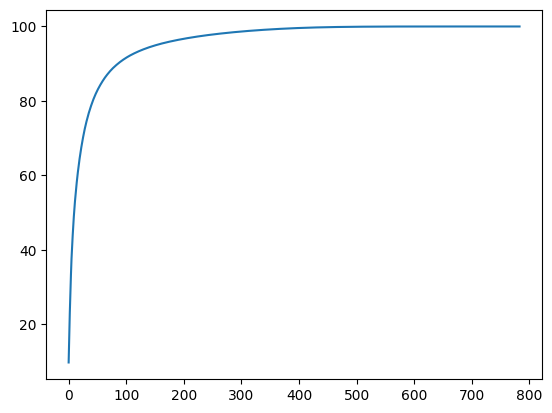

In [78]:
# plot the line chart

plt.plot(np.cumsum(pca.explained_variance_ratio_ * 100))

# So proved, approx 200 dimestions provide us 90% of variance